# EDA on Black Friday Dataset

## Importing all the necessary libraries 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Importing the Dataset

In [62]:
df_train= pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [63]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


## Combining test dataset and train dataset using concat feature of pandas

In [64]:
df= pd.concat([df_train,df_test], ignore_index=True, axis= 0, join= "outer" )

In [65]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


# Problem Statement

A retail company  wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Getting fundamental insights into the data

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [67]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [68]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [69]:
df.drop(['User_ID'], axis= 1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


## Handling Categorical features

### Gender

In [70]:
df['Gender']=pd.get_dummies(df["Gender"], drop_first= True)

In [71]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


## Female is replaced by 0 ,whereas male is replace by 1

### Age

In [72]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [73]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [74]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,2,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,0,2,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,0,2,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,0,4,1,C,4+,0,10,16.0,NaN,NaN


## City Category

In [75]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [76]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,0,1


In [77]:
df=pd.concat([df,df_city],axis=1)

In [78]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,2,15,B,4+,1,8,NaN,NaN,NaN,1,0
783663,1006036,P00254642,0,2,15,B,4+,1,5,8.0,NaN,NaN,1,0
783664,1006036,P00031842,0,2,15,B,4+,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,4,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [80]:
df.drop('City_Category',axis=1,inplace=True)
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,2,15,4+,1,8,NaN,NaN,NaN,1,0
783663,1006036,P00254642,0,2,15,4+,1,5,8.0,NaN,NaN,1,0
783664,1006036,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,4,1,4+,0,10,16.0,NaN,NaN,0,1


## Dealing with Missing Values

In [81]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [82]:
pc2_mean=np.mean(df['Product_Category_2'])

In [83]:
pc2_mean

9.844505612021909

In [84]:
df['Product_Category_2']=df['Product_Category_2'].fillna(value='9.84')

In [85]:
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,9.84,NaN,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,9.84,NaN,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,6,16,4+,0,8,9.84,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,2,15,4+,1,8,9.84,NaN,NaN,1,0
783663,1006036,P00254642,0,2,15,4+,1,5,8.0,NaN,NaN,1,0
783664,1006036,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,4,1,4+,0,10,16.0,NaN,NaN,0,1


In [86]:
pc3_mean=np.mean(df['Product_Category_3'])
pc3_mean

12.668604797820548

In [87]:
df['Product_Category_3']=df['Product_Category_3'].fillna(value='12.66')

In [88]:
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,9.84,12.66,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,9.84,12.66,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,12.66,1057.0,0,0
4,1000002,P00285442,1,6,16,4+,0,8,9.84,12.66,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,2,15,4+,1,8,9.84,12.66,NaN,1,0
783663,1006036,P00254642,0,2,15,4+,1,5,8.0,12.66,NaN,1,0
783664,1006036,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,4,1,4+,0,10,16.0,12.66,NaN,0,1


In [89]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

## Stay in current cities years

In [90]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [91]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace("+"," ")

<ipython-input-91-9f1fdd812c2c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace("+"," ")


In [92]:
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,9.84,12.66,8370.0,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,0,10,2,0,12,9.84,12.66,1422.0,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,12.66,1057.0,0,0
4,1000002,P00285442,1,6,16,4,0,8,9.84,12.66,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,2,15,4,1,8,9.84,12.66,NaN,1,0
783663,1006036,P00254642,0,2,15,4,1,5,8.0,12.66,NaN,1,0
783664,1006036,P00031842,0,2,15,4,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,4,1,4,0,10,16.0,12.66,NaN,0,1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  uint8  
 3   Age                         783667 non-null  int32  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  object 
 9   Product_Category_3          783667 non-null  object 
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(1),

## Even after converting the categorical features to numerical ones , it still says obj 

In [94]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)  

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  uint8  
 3   Age                         783667 non-null  int32  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  object 
 9   Product_Category_3          783667 non-null  object 
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(1),

In [96]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df['Gender']=df['Gender'].astype(int)
df['Product_Category_2']=df['Product_Category_2'].astype(float)
df['Product_Category_3']=df['Product_Category_3'].astype(float)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int32  
 3   Age                         783667 non-null  int32  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

# Visualisation using seaborn

C:\Users\purva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

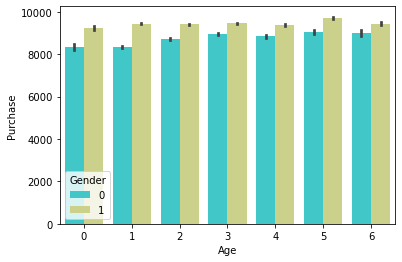

In [115]:
## Visualisation of purchase with age
sns.barplot('Age','Purchase', hue= 'Gender', data=df, palette='rainbow')

## OBSERVATIONS: Males tend to purchase more than Females

C:\Users\purva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

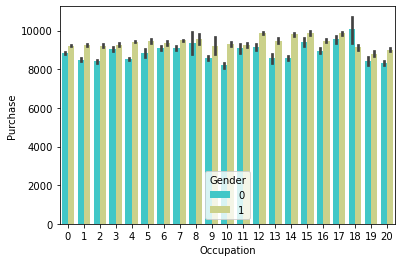

In [110]:
## Visualisation of purchase with Occupation
sns.barplot('Occupation','Purchase', hue= 'Gender', data=df, palette='rainbow')

C:\Users\purva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

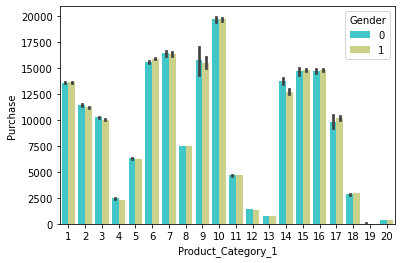

In [111]:
##Visualisation of product category 
sns.barplot('Product_Category_1','Purchase', hue= 'Gender', data=df, palette='rainbow')

C:\Users\purva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

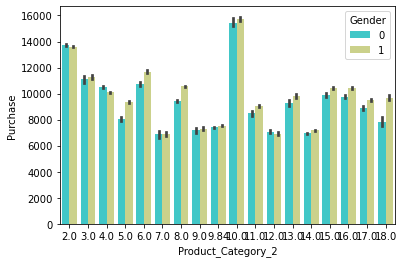

In [112]:
sns.barplot('Product_Category_2','Purchase', hue= 'Gender', data=df, palette='rainbow')

C:\Users\purva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

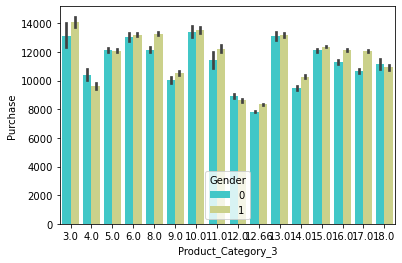

In [113]:
sns.barplot('Product_Category_3','Purchase', hue= 'Gender', data=df, palette='rainbow')